In [1]:
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
from mpl_toolkits import mplot3d as mpl3d
from scipy import signal, stats, linalg, fft

# import our 'specsens' package with the help of 'sys'
import sys
sys.path.insert(0, '..')
import specsens as ss

---- Simulation parameters ----
Generations:    50
Iterations:     300
Total iters:    15000
Signal power:   0.00 dB
Noise power:    0.00 dB
Noise uncert:   0.00 dB
SNR:            0.00 dB
Signal length:  0.000040 sec
Signal samples: 40
---- Simulation stats theory ----
Prob false alarm 0.1000
Prob detection   0.9981
Threshold        48.2891
---- Running simulation ----
Using 8 processes on 8 cores


100%|██████████| 50/50 [00:01<00:00, 40.85it/s]


---- Simulation stats ----
Prob false alarm theory 0.1000
Prob false alarm sim    0.1041
Prob detection theory   0.9981
Prob detection sim      0.9995


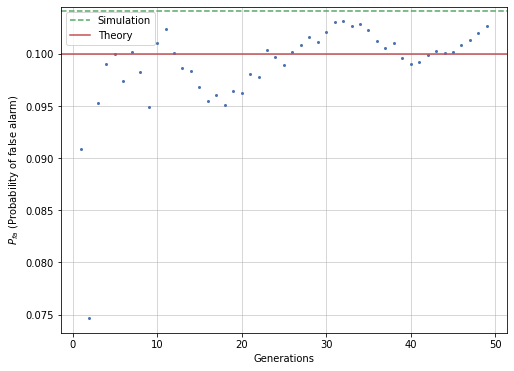

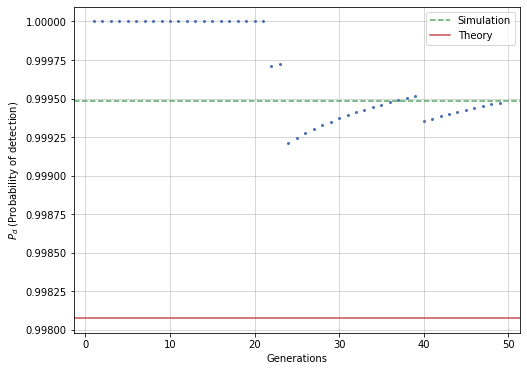

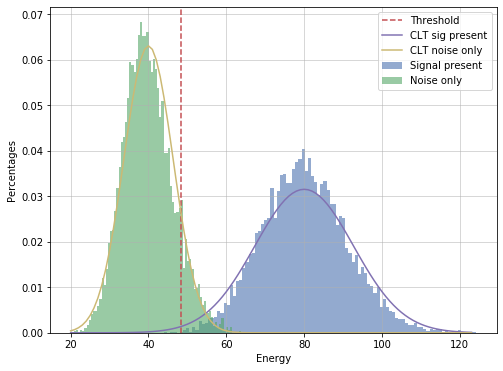

---- Distribution stats ----
Sig present mean 80.07
Sig absent  mean 39.89
Sig present var  120.52
Sig absent  var  40.59
Sig present std  10.98
Sig absent  std  6.37


In [3]:
# narrow band energy detector simulation

_ = ss.narrowband_sim(
    gens=50,  # generations, number of environments
    itrs=300,  # iterations, number of tests in each environment
    f_sample=1e6,  # in Hz
    signal_power=0.0,  # in dB
    noise_power=0.0,  # in dB
#     length_sec=0.001024,  # length of each section in seconds
    length_sec=0.00004,  # length of each section in seconds
    theo_pfa=0.1,  # probability of false alarm
    noise_uncert=0.0,  # standard deviation of the noise normal distribution
    num_procs=None)  # number of processes to run in parallel